<a href="https://colab.research.google.com/github/MarcusBae/AIFFEL_quest_eng/blob/main/Data_Analysis/DA01/Sub_Quest_DA01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 프로젝트 1 : 선형회귀, 당뇨병 수치
* 프로젝트 1의 회귀모델 예측정확도가 기준 이상 높게 나왔는가?

* MSE 손실함수값 3000 이하를 달성

In [20]:
# (1) 데이터 가져오기
from sklearn.datasets import load_diabetes

data = load_diabetes()
df_X = data.data
df_y = data.target

print(df_X.shape)
print(df_y.shape)

(442, 10)
(442,)


In [21]:
# data 특성 파악
for i, feture_name in enumerate(data.feature_names):
    print(f'feature {i+1} : {feture_name}')

print(f'df_X[0]: {df_X[0]}')
print(f'df_y[0]: {df_y[0]}')

feature 1 : age
feature 2 : sex
feature 3 : bmi
feature 4 : bp
feature 5 : s1
feature 6 : s2
feature 7 : s3
feature 8 : s4
feature 9 : s5
feature 10 : s6
df_X[0]: [ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990749 -0.01764613]
df_y[0]: 151.0


In [22]:
# (2) 모델에 입력할 데이터 X 준비하기
import numpy as np
X = np.array(df_X)

print(type(X), X.dtype)

<class 'numpy.ndarray'> float64


In [23]:
# (3) 모델에 예측할 데이터 y 준비하기
#    df_y -> numpy array로 변환 저장
y = np.array(df_y)

print(type(y), y.dtype)

<class 'numpy.ndarray'> float64


In [24]:
# (4) train 데이터와 test 데이터로 분리하기 - 8:2
# random_state - 난수 seed 값

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [25]:
# (5) 모델 준비하기
# 10개의 W, 1개의 bias 준비 - 모두 랜덤으로
W = np.random.rand(X_train.shape[1])
b = np.random.rand()

print(len(W))

10


In [26]:
# 선형 회기 예측 수행
#   X 입력, W 가중치 벡터, b : 편향
def model(X, W, b):
    predictions = 0
    for i in range(len(W)):
        predictions += X[:, i] * W[i] # i th 특성 x 가중치 곱 누적
    predictions += b
    return predictions

In [27]:
# (6) 손실함수 loss 정의
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L


In [28]:
# (7) 기울기를 구하는 gradient 함수 구현하기
#     현재 가중치 W와 편향 b에서 손실 함수(MSE)를 최소화하기 위한
#     기울기 dW, db를 계산한다
def gradient(X, W, b, y):
    N = len(y)
    y_pred = model(X, W, b)
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()

    return dW, db

In [29]:
# (8) 하이퍼 파라미터 - 학습률 설정
LEARNING_RATE = 0.15

In [30]:
# (9) 모델 학습하기
# 정의된 손실함수와 기울기 함수로 모델을 학습
# loss값이 충분히 떨어질 때까지 학습을 진행해.
# 입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮
# 다양한 데이터로 실험해.

%%timeit -n 1 -r 1
global W, b

losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))


Iteration 100 : Loss 5108.9643
Iteration 200 : Loss 4502.8410
Iteration 300 : Loss 4106.7193
Iteration 400 : Loss 3838.9997
Iteration 500 : Loss 3651.2794
Iteration 600 : Loss 3514.6140
Iteration 700 : Loss 3411.5010
Iteration 800 : Loss 3331.1961
Iteration 900 : Loss 3266.9714
Iteration 1000 : Loss 3214.5076
115 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [31]:
# (10) test 데이터에 대한 성능 확인하기
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

np.float64(2961.3198596470015)

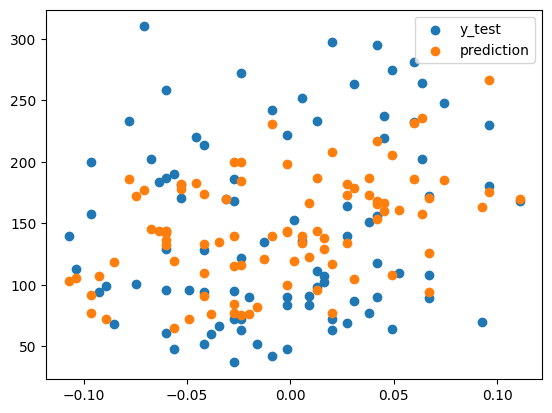

In [32]:
# (11) 정답 데이터와 예측한 데이터 시각화하기
# x축에는 X 데이터의 첫 번째 컬럼
# y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화

import matplotlib.pyplot as plt

plt.scatter(X_test[:, 0], y_test, label="y_test")
plt.scatter(X_test[:, 0], prediction, label="prediction")

plt.legend()
plt.show()

### 회고 
- 이번 프로젝트를 하면서 느낀점, 배운점
	- 딱히 없다.
	
- 이번 프로젝트에서 잘 했다고 생각이 드는 점.
	- 딱히 없다.

- 이번 프로젝트에서 느낀 문제점.
	- 난이도는 갑자기 올라 갔는데 내 준비가 부족하다.
  
- 다음에는 이렇게 해야겠다 생각한 점.
	- 고민하고 있다. 